# Kmeans - Theo thuật toán

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # dùng để tính khoảng cách

In [2]:
np.random.seed(11)

Được dùng để các lần chạy khác nhau sinh ra các số ngẫu nhiên giống nhau

In [3]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500

**means:** được dùng để tạo ra các điểm ở trung tâm trên không gian <br>
**cov:** là ma trận hiệp phương sai, mỗi phần tử trên 1 ma trận thể hiện sự tương quan giữa 2 biến. Nếu $cov_{ij} = 1$ thì 2 biến phụ thuộc tuyến tính vào nhau. Ngược lại, $cov_{ij} = 0$ thì 2 biến độc lập. <br>
Ở đây là không gian 2 chiều nên cov có kích thước $2\times2$. Muốn các điểm theo phân phối chuẩn (tức là càng gần `means[i]` thì càng nhiều) và tung độ và hoành độ không phụ thuộc vào nhau nên $cov_{ii} = 1$ và $cov_{ik} = 0$ với $i \neq k$

In [4]:
X0 = np.random.multivariate_normal(means[0], cov, N) # tạo ra các điểm xung quanh điểm 2, 2 với mật độ phân phối chuẩn
X1 = np.random.multivariate_normal(means[1], cov, N) # kích thước 500x2
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0) # nối 3 mảng
K = 3 # số cluster muốn chia
original_label = np.asarray([0]*N + [1]*N + [2]*N).T # ma trận cột


In [5]:
temp = np.array([0, 0, 1, 1, 2, 2])
temp == 0

array([ True,  True, False, False, False, False])

toán tử `==` trong thao tác trên sẽ tạo ra 1 array, nếu giá trị phần tử đó mà bằng giá trị sau dấu `==` thì sẽ là `True`, ngược lại thì sẽ là `False`

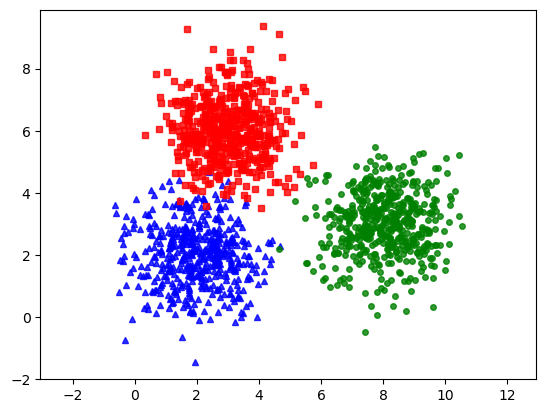

In [6]:
def kmeans_display(X, label): # hàm hiển thị
    K = np.amax(label, axis=None) + 1 
    X0 = X[label==0, :]
    X1 = X[label==1, :]
    X2 = X[label==2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X, original_label)

`np.amax(arr, axis)` trả về giá trị lớn nhất của ma trận theo các trục<br>
- axis=None: return giá trị lớn nhất của mảng
- axis=0: return array các giá trị lớn nhất của từng hàng
- axis=1: return array các giá trị lớn nhất của từng cột
### Giải thích X[label==`value`, :]
#### Đây được gọi là data indexing
`X` là ma trận $1500\times2$ (Do nối 3 array `X0, X1, X2`), tương ứng index từ 0 đến 499 là của `X0`, 500 đến 999 là của `X1`, 1000 đến 1499 là của `X2`. <br>
Như đã giải thích bên trên, `label==value` sẽ trả về 1 array (tạm gọi là `ID`) có kích thước bằng kích thước array `label`, tại mỗi vị trí tương ứng sẽ có giá trị `True/False`. array `ID` được đặt dọc để lấy các hàng. Nếu hàng tại vị trí `i` có `ID[i] = True` thì hàng đó sẽ được lấy <br>
Dễ thấy nếu `label==0` thì 500 phần tử đầu của `ID` sẽ là `True`, 1000 phần tử còn lại sẽ là `False`. Tương ứng với `X0`. Vậy `X0` trong hàm chính là `X0` ban đầu. <br>
Tương tự với `X1` `X2`
</br>

 `X0[:, index]` là lấy toàn bộ cột `index` của ma trận `X0`

In [7]:
def kmeans_init_centers(X, k): # Hàm khởi tạo các centers
    return X[np.random.choice(X.shape[0], k, replace=False)]
#np.random.choice(X.shape[0], k, replace=False) trả về k index bất kì
#X[np...] lấy giá trị của các index đó ở dạng ma trận

`np.random.choice(a, size, replace)`
- a: 1 array hoặc 1 số,
    - Nếu là array thì hàm sẽ trả về 1 array có size phần tử lấy từ a
    - Nếu là số thì hàm sẽ trả về 1 array có các phần tử nhỏ hơn hoặc bằng a
- size: kích thước array trả về
- replace: `True/False` các số có khác nhau hay không. Mặc định là `True`: có thể trùng nhau

In [8]:
def kmeans_assign_labels(X, centers): # Hàm gán các nhãn với các điểm
    D = cdist(X, centers) # Tính toàn bộ khoảng cách các điểm từ X đến các điểm center
    # D trả về là 1 ma trận 2 chiều vì X là ma trận 1500x2, centers là ma trận 3x2 => D có kích thước 1500*3
    # Trong đó cột i của D là các khoảng cách của điểm centers[i] đến các điểm của X
    return np.argmin(D, axis=1) # trả về 3 chỉ số của khoảng cách nhỏ nhất theo cột

`numpy.argmin(array, axis = None, out = None)` trả về array chỉ số (index) của phần tử nhỏ nhất trong mảng theo trục nhất định
- array: ma trận cần tính
- axis: 
    - 0: ứng với các cột
    - 1: ứng với các hàng

In [9]:
def kmeans_update_centers(X, labels, K): # Cập nhật các giá trị centers
    centers = np.zeros((K, X.shape[1])) # tạo ra ma trận 3x2 (K=số cluster, X.shape=(1500, 2) => X.shape[1] = 2)
    for k in range(K):
        Xk = X[labels==k, :] # lọc ra các điểm thuộc cluster k
        centers[k,:] = np.mean(Xk, axis=0) # cập nhật center là trung bình cộng các điểm thuộc cluster k
    return centers
# Giá trị trả về là cả k center của cluster

In [10]:
def has_converged(centers, new_centers): # Điều kiện dừng
    return (set([tuple(a) for a in centers])) == set([tuple(a) for a in new_centers]) #Nếu centers không thay đổi thì True

In [11]:
def kmeans(X, K): # Thuật toán kmeans-clustering
    centers = [kmeans_init_centers(X, K)] # Khởi tạo các center
    labels = [] # các nhãn
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1])) # Cứ sau mỗi lần thì label được dán lại nhãn cho các điểm
        new_centers = kmeans_update_centers(X, labels[-1], K) # Cập nhật lại các điểm center sau khi dán lại nhãn
        if has_converged(centers[-1], new_centers): # kiểm tra điều kiện
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Vì các `kmeans_assign_labels(), kmeans_update_centers()` đều trả về 1 ma trận nên label và center mới đều là phần tử cuối cùng (-1). Có thể dùng các biến đơn để thay thế (không cần list)

Center found: 
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


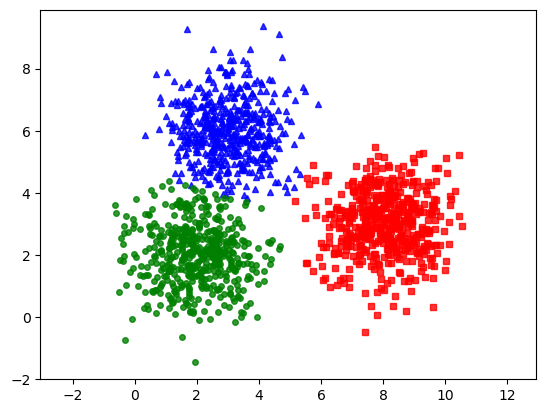

In [12]:
(centers, labels, it) = kmeans(X, K)
print('Center found: ')
print(centers[-1])
kmeans_display(X, labels[-1])

# Kmeans - Theo thư viện

Centers found by scikit-learn
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


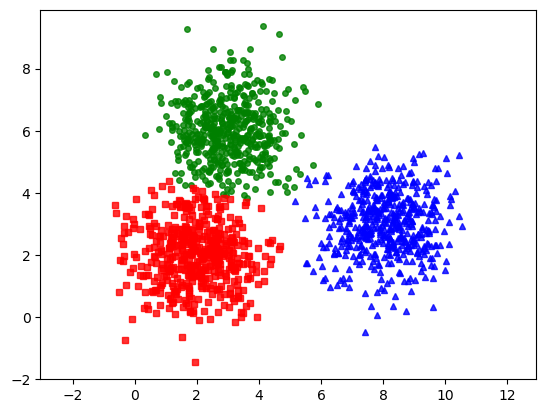

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)